# Fitting Curves to STELLAB Data

Prepared by @Marco Pignatari

This notebooks shows how to extract observational data from the STELLAB module in order to perform a polynomial fit to recover the global chemical evolution trends.

In [1]:
# Import Python packages
%matplotlib inline
import matplotlib
import matplotlib.pyplot as pl
import numpy as np

# Import the STELLAB module
import stellab as st

### Define Fitting Function and R-Squared Calculation

In [2]:
def func_rsquare(x, y, ord_polyfit):
    "function calculating R-square and R-square adjusted, for a given polynomial order of the regression line"
    
    # Calculate the polynomial coefficients
    coeffs = np.polyfit(x, y, ord_polyfit)
    p = np.poly1d(coeffs)
    
    # Fit values, and mean
    calc_val = p(x)                     
    av_val = np.sum(y)/float(len(y))         
    
    # Sum of the squared residuals
    ssreg = np.sum((y-calc_val)**2)   

    # Sum of the squared differences from the mean of the dependent variable
    sstot = np.sum((y - av_val)**2)    

    # Calculate R-squared
    rsquare = 1. - ssreg / sstot

    # Calculate R-squared adjusted, to keep into account order of polynomial and number of points to fit
    rsquare_adj = (1. - ssreg / sstot * ((float(len(x))-1.)/(float(len(x))-float(ord_polyfit)-1.)))
    return(rsquare,rsquare_adj)

### Extract Data from STELLAB

In [3]:
# Create a STELLAB instance
stellar_data = st.stellab()

In [4]:
# Define the X and Y axis (abundance ratios)
x_label = '[Fe/H]'
y_label = '[O/Fe]'

# Select the stellar data references
# You can also type "stellar_data.list_ref_papers()" to see all references
obs = ['stellab_data/milky_way_data/Frebel_2010_Milky_Way_stellab',
'stellab_data/milky_way_data/Venn_et_al_2004_stellab',
'stellab_data/milky_way_data/Hinkel_et_al_2014_stellab',
'stellab_data/milky_way_data/Akerman_et_al_2004_stellab',
'stellab_data/milky_way_data/Andrievsky_et_al_2007_stellab',
'stellab_data/milky_way_data/Andrievsky_et_al_2008_stellab',
'stellab_data/milky_way_data/Andrievsky_et_al_2010_stellab',
'stellab_data/milky_way_data/Bensby_et_al_2005_stellab',
'stellab_data/milky_way_data/Bihain_et_al_2004_stellab',
'stellab_data/milky_way_data/Bonifacio_et_al_2009_stellab',
'stellab_data/milky_way_data/Caffau_et_al_2005_stellab',
'stellab_data/milky_way_data/Cayrel_et_al_2004_stellab',
'stellab_data/milky_way_data/Fabbian_et_al_2009_stellab',
'stellab_data/milky_way_data/Gratton_et_al_2003_stellab',
'stellab_data/milky_way_data/Israelian_et_al_2004_stellab',
'stellab_data/milky_way_data/Lai_et_al_2008_stellab',
'stellab_data/milky_way_data/Lai_et_al_2008_stellab',
'stellab_data/milky_way_data/Nissen_et_al_2007_stellab',
'stellab_data/milky_way_data/Reddy_et_al_2006_stellab',
'stellab_data/milky_way_data/Reddy_et_al_2003_stellab',
'stellab_data/milky_way_data/Spite_et_al_2005_stellab',
'stellab_data/milky_way_data/Battistini_Bensby_2016_stellab',
'stellab_data/milky_way_data/Nissen_et_al_2014_stellab']

# Extract all selected data from STELLAB using "return_xy=True"
x,y = stellar_data.plot_spectro(xaxis=x_label, yaxis=y_label, obs=obs, return_xy=True)

### Fit Curves to Data

In [5]:
# Define the maximal polynomial order for the fit
pol_order = 5

results = []
results_adj =  []
# For all polynomial order..
for i in range(pol_order):
    
    # Calculate and keep in memory the fit
    dum,dum1 = func_rsquare(x,y,i+1)
    results.append(dum)
    results_adj.append(dum1)

### Plot Results

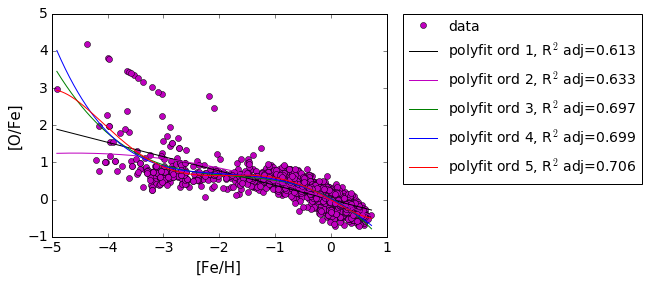

In [6]:
# Define the line colours and styles
lines = ['k-','m-','g-','b-','r-','c-','y-','k--','m--','g--','b--','r--','c--']

# Plot the observed data
%matplotlib inline
pl.plot(x,y,'mo',label='data')

# Plot the regression curves for each polynomial order
# Symbols and labels are automatically set
x_fit = np.arange(min(x)-0.01, max(x)+0.01, 0.001) 
for i in range(pol_order):
    coeffs = np.polyfit(x, y, i+1)
    p = np.poly1d(coeffs)
    pl.plot(x_fit,p(x_fit),lines[i],label='polyfit ord '+ str(i+1)+', R$^2$ adj='+'%2.3f' %results_adj[i])

# Set labels and digits size
pl.ylabel(y_label, fontsize=15.)
pl.xlabel(x_label, fontsize=15.)
matplotlib.rcParams.update({'font.size': 14.0})

# Legend outside the plot box
pl.legend(numpoints=1, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
pl.show()

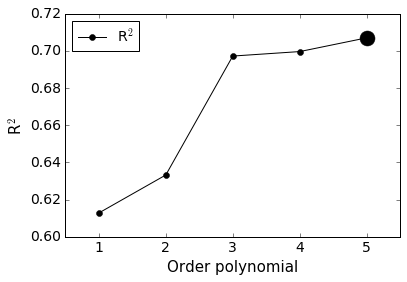

In [7]:
# Create the polynomial order array
order = np.arange(1,pol_order+1,1)

# Plot R-squared and its maximal value as a function of polynomial order
pl.plot(order, results, 'k-o', label='R$^2$')
pl.plot(order[np.argmax(results)], results[np.argmax(results)],'k-o',markersize=15.)

# Plot R-squared adjusted and its maximal value as a function of polynomial order
#pl.plot(order,results_adj,'r-s',label='R$^2$ adj')
#pl.plot(order[np.argmax(results_adj)],results_adj[np.argmax(results_adj)],'r-s',markersize=15.)

# Set the X-axis range and xticks (only integers)
pl.xlim(min(order)-0.5, max(order)+0.5)
pl.xticks(np.arange(min(order), max(order)+1, 1.0))

# Set labels and digits size
pl.ylabel('R$^2$', fontsize=15.)
pl.xlabel('Order polynomial', fontsize=15.)
matplotlib.rcParams.update({'font.size': 14.0})

# Legend
pl.legend(numpoints=1, loc='upper left', fontsize=14)
pl.show()